k-Means
=======

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

Consider the data and its initial partitions depicted below:

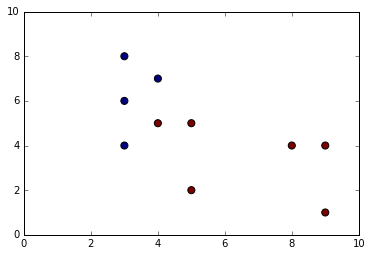

In [57]:
dataset = np.array([[3, 8], [4, 7], [3, 6], [3, 4], [4, 5], [5, 5], [5, 2], [8, 4], [9, 4], [9, 1]])
assignment = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

boundary = max(dataset[:,0].max(), dataset[:,1].max()) + 1

plt.axis([0, boundary, 0, boundary])
plt.scatter(dataset[:, 0], dataset[:, 1], c=assignment, s=50)
plt.show()

Apply the k-Means algorithm to find two clusters. Use the Manhattan distance as metric and give the clustering results after each iteration of the algorithm, including the coordinates of the cluster means.

[[ 3.25        6.25      ]
 [ 6.66666667  3.5       ]]


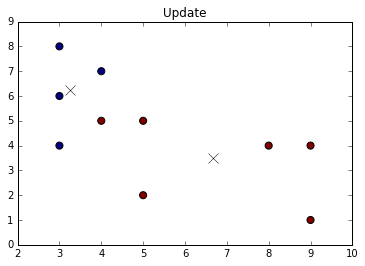

[[ 3.66666667  5.83333333]
 [ 7.75        2.75      ]]


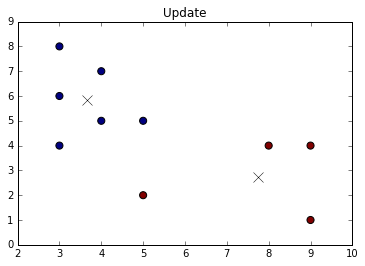

[[ 3.66666667  5.83333333]
 [ 7.75        2.75      ]]


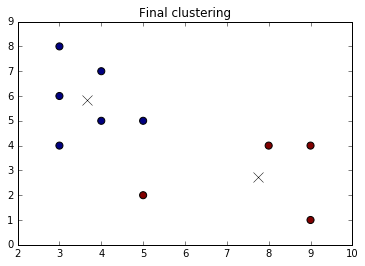

In [99]:
class KMeansClustering():
    
    def __init__(self, dataset, assignment, k=2):
        self.k = k
        self.dataset = dataset
        self.assignment = assignment
        self.centroids = self._centroids(assignment)
    
    def cluster(self):
        converged = False
        #previous_assignment = self.assignment
        previous_centroids = np.zeros((self.k, 2))
        while not converged:
            self.centroids = self._centroids(self.assignment)
            assignment = np.zeros(len(self.dataset))
            print(self.centroids)
            for index, point in enumerate(self.dataset):
                assignment[index] = self._label(point, self.centroids)
            # use the positional change of the centroids as a stopping criterion
            changes = np.sum(np.absolute(np.subtract(previous_centroids,self.centroids)), axis=1)
            change_rate = np.sum(changes) / len(changes)
            #if np.array_equal(previous_assignment, assignment):
            if change_rate < 0.05:
                converged = True
                self._plot("Final clustering")
            else:
                self._plot("Update")
                self.assignment = assignment
                #previous_assignment = assignment
                previous_centroids = self.centroids
        
    def _centroids(self, assignment):
        centroids = np.zeros((self.k, 2))
        for index, label in enumerate(np.unique(assignment)):
            mask = label == assignment
            members = self.dataset[mask,:]
            centroids[index] = np.mean(members, axis=0)
        return centroids
    
    def _label(self, point, centroids):
        distances = np.sum(np.absolute(centroids - point), axis=1)
        label = np.argmin(distances)
        return label
    
    def _plot(self, title):
        plt.scatter(self.dataset[:,0], self.dataset[:,1], c=self.assignment, s=50)
        plt.plot(self.centroids[:,0], self.centroids[:,1], 'kx', markersize=10, label='medoids')
        plt.title(title)
        plt.show()

        
clustering = KMeansClustering(dataset, assignment, k=2)
centroids = clustering.cluster()